In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score




In [254]:
data=pd.read_csv('Churn_Modelling.csv')

In [255]:
data.shape

(10000, 14)

In [256]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [258]:
data.duplicated().sum()

0

In [259]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [260]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [261]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [262]:
df=pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True).astype(int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [263]:
X=df.drop(columns='Exited')
y=df['Exited']

In [264]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42)

In [265]:
X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [266]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.5288,96.653299,350.0,584.00,652.0,718.00,850.0
Age,10000.0,38.9218,10.487806,18.0,32.00,37.0,44.00,92.0
Tenure,10000.0,5.0128,2.892174,0.0,3.00,5.0,7.00,10.0
Balance,10000.0,76485.5715,62397.185107,0.0,0.00,97198.0,127643.75,250898.0
NumOfProducts,10000.0,1.5302,0.581654,1.0,1.00,1.0,2.00,4.0
HasCrCard,10000.0,0.7055,0.455840,0.0,0.00,1.0,1.00,1.0
IsActiveMember,10000.0,0.5151,0.499797,0.0,0.00,1.0,1.00,1.0
EstimatedSalary,10000.0,100089.7484,57510.491042,11.0,51001.75,100193.5,149387.75,199992.0
Geography_Germany,10000.0,0.2509,0.433553,0.0,0.00,0.0,1.00,1.0
Geography_Spain,10000.0,0.2477,0.431698,0.0,0.00,0.0,0.00,1.0


In [267]:
scaler=StandardScaler()
scaled_x_train=scaler.fit_transform(X_train)
scaled_x_valid=scaler.transform(X_valid)



In [268]:
model=Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [269]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [270]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [271]:
hist=model.fit(scaled_x_train,y_train,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6892
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5530
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4928
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4654
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4650
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4516
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4512
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4518
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4358
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4296


In [272]:
hist.history

{'loss': [0.6451066732406616,
  0.535136878490448,
  0.48901182413101196,
  0.4680997133255005,
  0.45667940378189087,
  0.44888827204704285,
  0.4427341818809509,
  0.4377067983150482,
  0.43368813395500183,
  0.43054887652397156]}

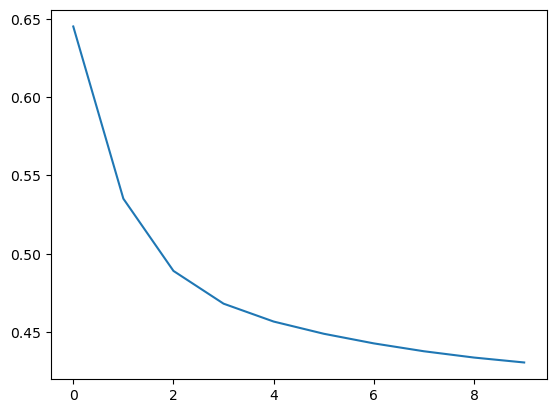

In [273]:
plt.plot(hist.history['loss'])

In [274]:
model.layers[0].get_weights()

[array([[ 0.15408675, -0.00888979,  0.06146824],
        [-0.54905593,  0.91960645, -2.0282462 ],
        [ 0.22805953, -0.2921336 , -0.03057792],
        [-0.7838982 ,  0.22101225, -0.06753292],
        [ 0.1353074 ,  0.2901584 ,  0.42500478],
        [-0.19730316, -0.15200143,  0.0139197 ],
        [ 1.3045009 , -0.7333765 ,  0.4091335 ],
        [-0.05856109,  0.1827412 , -0.01097889],
        [-0.63292706,  0.45568934, -0.502901  ],
        [-0.1465403 ,  0.3254025 ,  0.19614147],
        [ 0.9184515 , -0.6905637 ,  0.23202574]], dtype=float32),
 array([ 0.33772248, -0.40866014,  0.5833952 ], dtype=float32)]

In [275]:
model.predict(scaled_x_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.17857872],
       [0.10026804],
       [0.2871665 ],
       ...,
       [0.3652229 ],
       [0.08160015],
       [0.19564882]], dtype=float32)

In [276]:
y_pred=np.where(model.predict(scaled_x_valid)>0.5,1,0)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [277]:
accuracy_score(y_valid,y_pred)

0.8155

In [278]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [279]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [280]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [281]:
hist_=model.fit(scaled_x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7030 - loss: 0.5805 - val_accuracy: 0.8025 - val_loss: 0.4540
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.4543 - val_accuracy: 0.8144 - val_loss: 0.4295
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4400 - val_accuracy: 0.8225 - val_loss: 0.4190
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8162 - loss: 0.4364 - val_accuracy: 0.8300 - val_loss: 0.4112
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8273 - loss: 0.4159 - val_accuracy: 0.8325 - val_loss: 0.4064
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8221 - loss: 0.4107 - val_accuracy: 0.8338 - val_loss: 0.4055
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8297 - loss: 0.4133 - val_accuracy: 0.8363 - val_loss: 0.4007
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8299 - loss: 0.4135 - val_accu

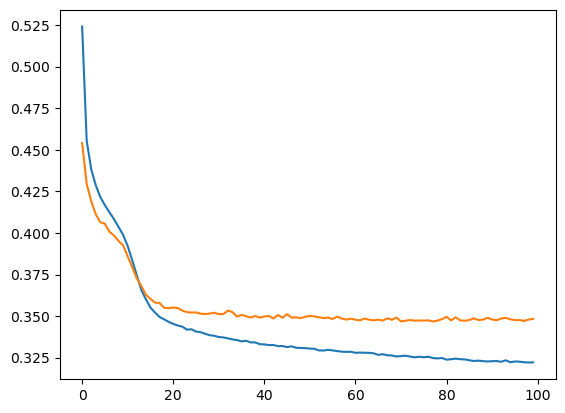

In [282]:
plt.plot(hist_.history['loss'])
plt.plot(hist_.history['val_loss'])

In [283]:
hist_.history['loss']

[0.5241241455078125,
 0.4554201066493988,
 0.4381742775440216,
 0.42854994535446167,
 0.42153578996658325,
 0.4166446030139923,
 0.4123709499835968,
 0.40823689103126526,
 0.40353530645370483,
 0.3987906575202942,
 0.3920624554157257,
 0.3835979104042053,
 0.3744927942752838,
 0.36566758155822754,
 0.3600750267505646,
 0.3551117777824402,
 0.35214242339134216,
 0.3494793772697449,
 0.34805384278297424,
 0.34649839997291565,
 0.3452768623828888,
 0.34435710310935974,
 0.34361717104911804,
 0.34187471866607666,
 0.342058002948761,
 0.3406839370727539,
 0.34034016728401184,
 0.33934032917022705,
 0.3385004699230194,
 0.33813759684562683,
 0.33741122484207153,
 0.33718541264533997,
 0.3366008996963501,
 0.33597275614738464,
 0.3355737030506134,
 0.33479809761047363,
 0.335144966840744,
 0.3341776132583618,
 0.33416295051574707,
 0.3330928683280945,
 0.33298495411872864,
 0.3325735926628113,
 0.3326195180416107,
 0.3319184184074402,
 0.3319874107837677,
 0.33135902881622314,
 0.331794291734

In [284]:
model.predict(scaled_x_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.01749257],
       [0.02143754],
       [0.12545456],
       ...,
       [0.8312684 ],
       [0.13875617],
       [0.2892229 ]], dtype=float32)

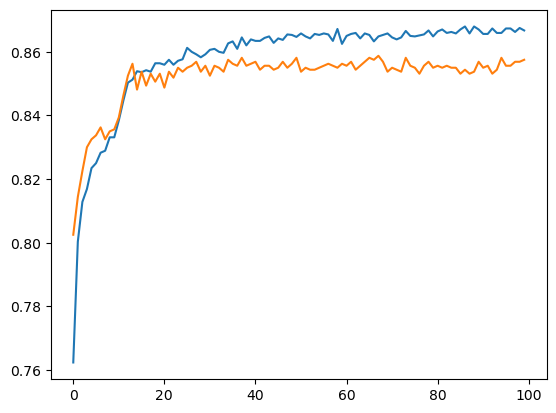

In [285]:
plt.plot(hist_.history['accuracy'])
plt.plot(hist_.history['val_accuracy'])

In [286]:
y_pred=np.where(model.predict(scaled_x_valid)>0.5,1,0)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [287]:
y_final=accuracy_score(y_valid,y_pred)
y_final

0.8595